<a href="https://colab.research.google.com/github/CrushedKatana/Machine_Learning/blob/main/JS11_TG01_2341720205_Charellino_Kalingga_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Lab 1

## Langkah 1 - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Langkah 2 - Membuat Data Dummy

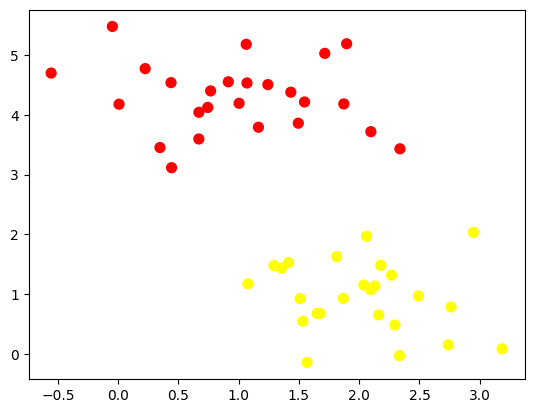

In [ ]:

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Buat Ilustrasi Garis Pemisah

## Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

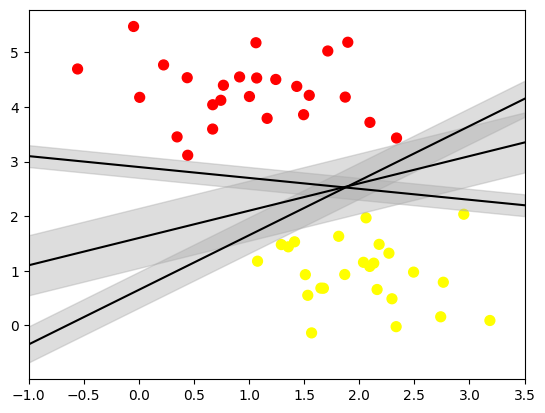

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Langkah 5 - Fitting Model

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

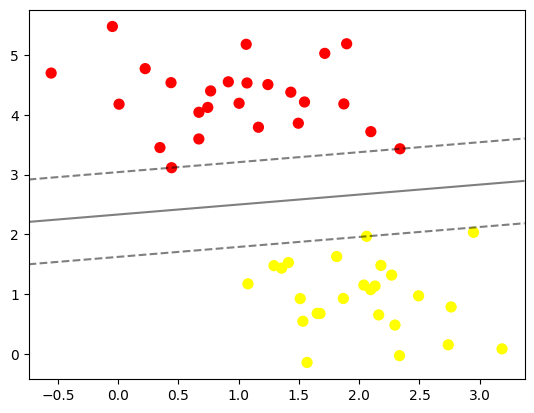

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

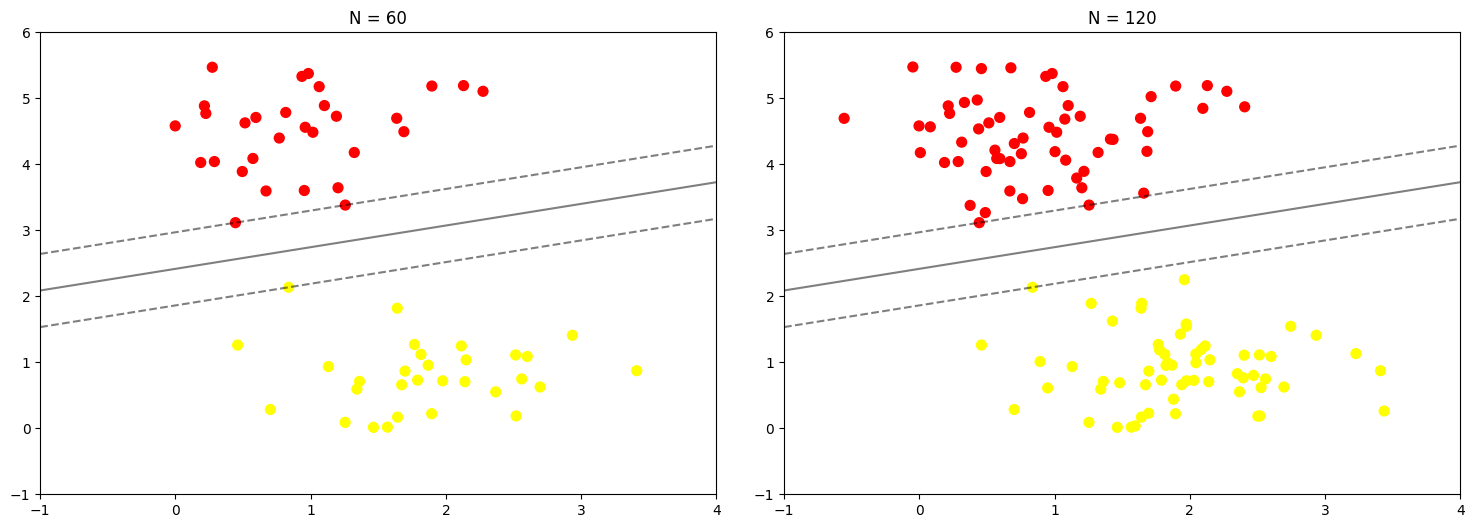

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# Lab 2

## Langkah 1 - Ilustrasi Data Non-Linier

### Langkah 1a - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

## Langkah 1b - Buat Kembali Fungsi Plotting

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Langkah 1c - Buat Data Dummy Non-Linier

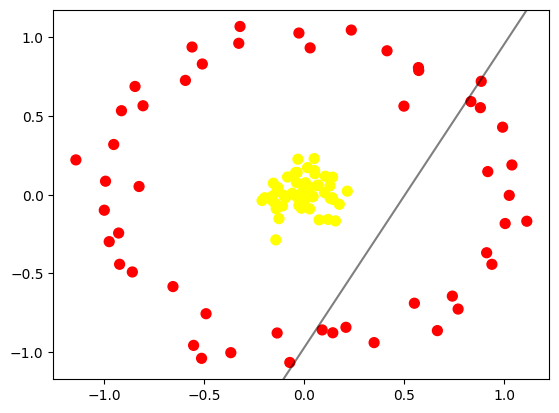

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
r = np.exp(-(X**2).sum(1))

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.21506693,  0.02324083],
       [-0.03535006, -0.01521095],
       [-0.92643337, -0.24293311],
       [-0.95097216,  0.31972492],
       [-0.14385413, -0.05637284],
       [ 1.00334926, -0.18252862],
       [ 0.04022164, -0.01315842],
       [ 0.20842038, -0.84203406],
       [-0.99185286,  0.08638938],
       [-0.13971324, -0.08890626],
       [ 0.02731938, -0.08959517],
       [ 0.07444219, -0.15929927],
       [-0.00360997,  0.05774043],
       [-1.13981787,  0.22187534],
       [ 0.14275755, -0.87682528],
       [-0.36636491, -1.00324552],
       [ 0.08983453, -0.85876363],
       [ 0.41351444,  0.915229  ],
       [ 0.0240431 ,  0.04753241],
       [ 0.87959105,  0.55362924],
       [ 0.23508611,  1.0469408 ],
       [ 0.04986935,  0.23041566],
       [ 0.01665519,  0.17267012],
       [ 0.91085329, -0.36821852],
       [-0.5521464 , -0.95687253],
       [ 0.04478183, -0.01125113],
       [ 0.06232089,  0.05780282],
       [-0.84456972,  0.68856542],
       [ 0.91652212,  0.14746176],
       [-0.13502584, -0.87819905],
       [ 1.11136782, -0.16790839],
       [-0.21049602, -0.0364019 ],
       [-0.32039018,  1.0696889 ],
       [ 0.99055134,  0.42971181],
       [ 0.00665787,  0.07630377],
       [-0.01446423, -0.08495603],
       [-0.04310661,  0.14183441],
       [-0.0113427 ,  0.01368334],
       [ 0.49790624,  0.56352144],
       [-0.19744016, -0.01881828],
       [-0.8047233 ,  0.56587778],
       [ 0.06942306,  0.0615211 ],
       [-0.50865249,  0.831267  ],
       [ 0.10512009,  0.11798116],
       [-0.51241897, -1.03919247],
       [-0.32665936,  0.96284215],
       [-0.91232004,  0.5343415 ],
       [ 1.02375537, -0.00355281],
       [-0.03871431,  0.07832447],
       [-0.09334273, -0.01822941],
       [ 0.11968192, -0.15671988],
       [-0.59304759,  0.7270819 ],
       [-0.00223105, -0.04073338],
       [-0.03145766,  0.2262147 ],
       [-0.48999789, -0.75565849],
       [ 0.88380274,  0.72127064],
       [ 0.34904509, -0.93936587],
       [-0.55987434,  0.9391442 ],
       [-0.97350463, -0.2976939 ],
       [ 0.83233628,  0.59237166],
       [ 0.5717284 ,  0.79011247],
       [-0.13654556,  0.02202875],
       [ 0.14183294,  0.11234495],
       [-0.08326884,  0.11319403],
       [ 0.17522016, -0.06011755],
       [-0.16087505, -0.00965337],
       [-0.9980231 , -0.09792087],
       [ 0.02154289, -0.00458198],
       [ 0.05209733,  0.15346468],
       [ 0.93715602, -0.44175033],
       [-0.1258806 , -0.15143146],
       [ 0.02968617,  0.9337427 ],
       [ 1.03701514,  0.18956819],
       [-0.85801435, -0.49037604],
       [-0.15523526, -0.04179832],
       [ 0.73967729, -0.64378411],
       [ 0.55014523, -0.68900357],
       [-0.10845822, -0.07075099],
       [ 0.15616767, -0.16606842],
       [ 0.76850132, -0.7261071 ],
       [-0.10132013, -0.00348464],
       [-0.92160005, -0.44148088],
       [ 0.13980075, -0.01822893],
       [-0.02640784,  1.02795802],
       [-0.82441695,  0.05284121],
       [-0.05967965,  0.00964084],
       [ 0.5704287 ,  0.80846601],
       [ 0.66490833, -0.86308623],
       [ 0.05247572,  0.13432927],
       [-0.13109633,  0.04602201],
       [-0.15433492,  0.07371356],
       [-0.65516463, -0.58311526],
       [ 0.12837885,  0.05714282],
       [ 0.12991844, -0.02268083],
       [-0.07186602, -1.06555828],
       [-0.02677226, -0.06722175],
       [-0.03534235,  0.14196182],
       [ 0.10156733,  0.01409423],
       [-0.14180713, -0.28645773],
       [ 0.14356653, -0.02922291]]), y=array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]))>

## Langkah 2 - Fitting Model

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

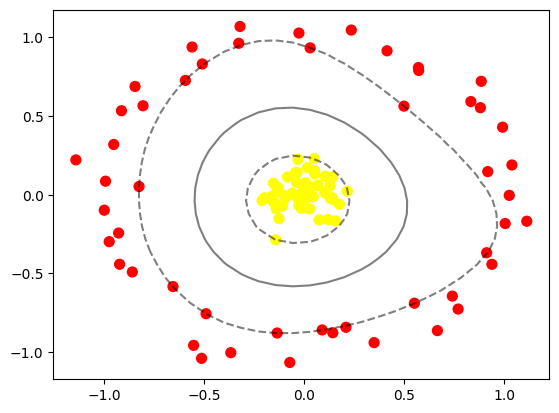

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# Lab 3

## Langkah 1 - Import Library dan Buat Fungsi Plotting



In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Langkah 2 - Buat Data Dummy

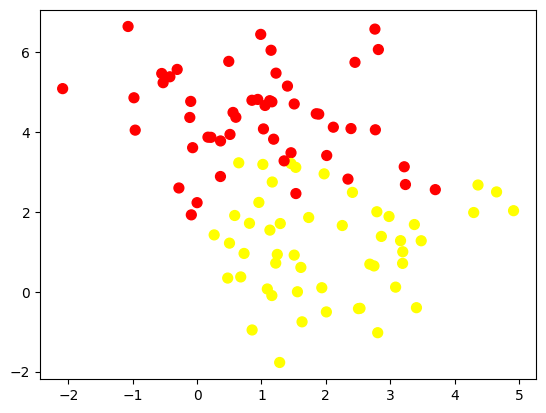

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Analisis Dampak Tunning

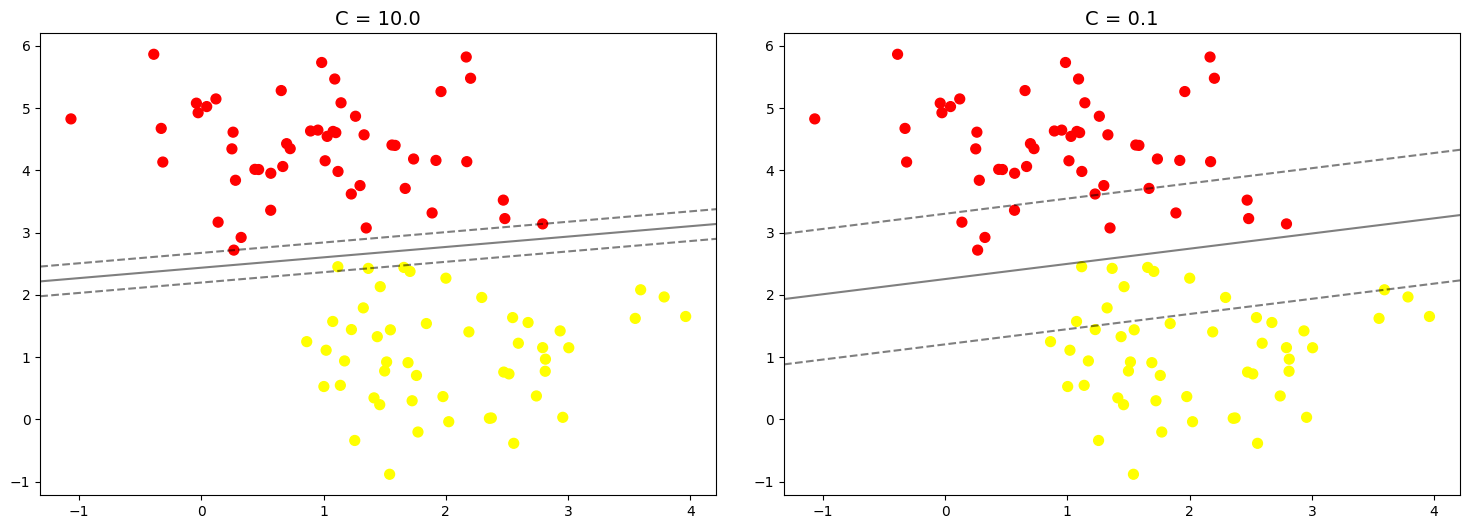

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Lab 4

## Langkah 0 - Unduh Dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Langkah 1 - Inspeksi Citra Wajah

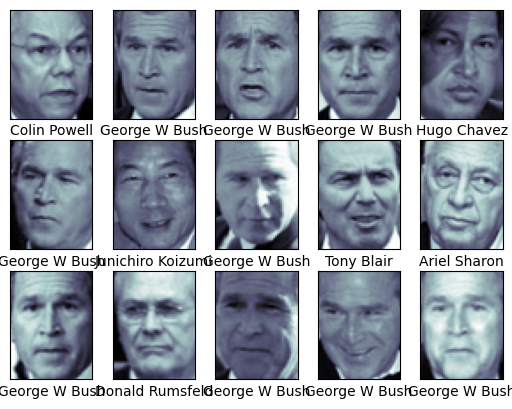

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Langkah 2 - Pra Pengolahan Data

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

## Langkah 3 - Split Data

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## Langkah 4 - Pembuatan Model + Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 3s, sys: 1.34 s, total: 2min 4s
Wall time: 1min 16s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## Langkah 5 - Cek Hasil Prediksi

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

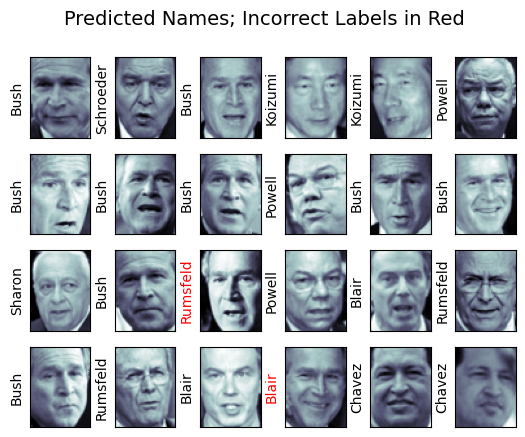

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

## Langkah 6 - Cek Performansi

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

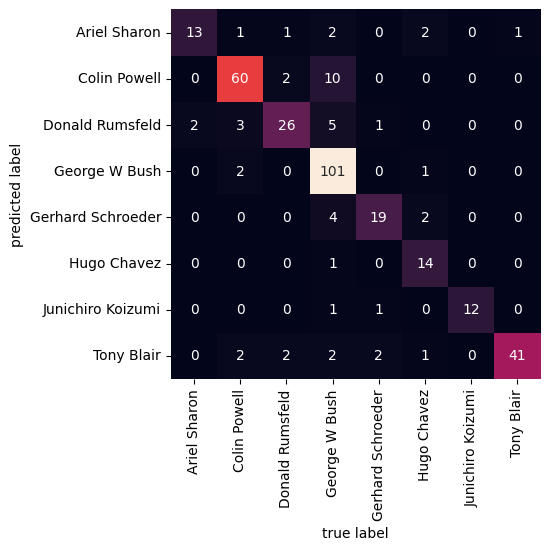

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Lab 5

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

base_dir = "/content/drive/MyDrive/images/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Image directories
train_dir = base_dir + "training/"
test_dir = base_dir + "test/"

## Langkah 1 - Load Data dan Visualisasikan

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[128, 140, 166],
         [128, 140, 166],
         [128, 140, 166],
         ...,
         [118, 136, 158],
         [118, 136, 158],
         [118, 136, 158]],
 
        [[128, 140, 166],
         [128, 140, 166],
         [128, 140, 166],
         ...,
         [118, 136, 158],
         [118, 136, 158],
         [118, 136, 158]],
 
        [[128, 140, 166],
         [128, 140, 166],
         [128, 140, 166],
         ...,
         [118, 136, 158],
         [118, 136, 158],
         [118, 136, 158]],
 
        ...,
 
        [[ 50,  35,  32],
         [ 51,  36,  33],
         [ 52,  37,  34],
         ...,
         [ 33,  34,  36],
         [ 33,  34,  36],
         [ 32,  33,  35]],
 
        [[ 50,  35,  32],
         [ 51,  36,  33],
         [ 52,  37,  34],
         ...,
         [ 34,  35,  37],
         [ 33,  34,  36],
         [ 33,  34,  36]],
 
        [[ 53,  38,  35],
         [ 53,  38,  35],
         [ 53,  38,  35],
         ...,
         [ 32,  33,  35],
  

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 16
(593, 800, 3)


In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (737, 1024, 3)
Label	: night


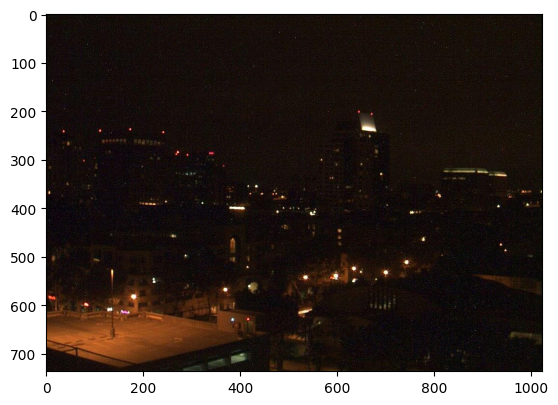

In [ ]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 210
(600, 1100, 3)


## Langkah 4 - Ekstraksi Fitur

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 62
Avg Brighness: 163.8033


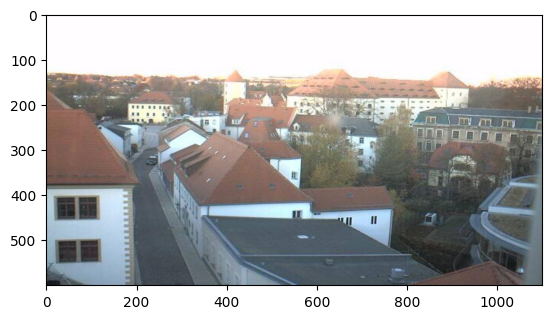

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold


In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 161
Actual label: 0
Predicted label: 0


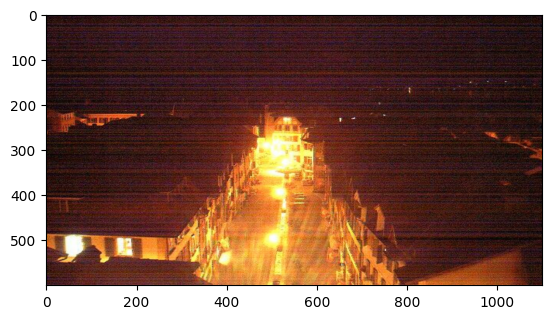

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi Manual

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


# Klasifikasi dengan SVM

## Langkah 4 Alternatif - Membuat Feature Vectors.


In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,117.414992,1.0
1,109.039258,1.0
2,123.251691,1.0
3,127.831659,1.0
4,141.002721,1.0


In [ ]:

# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,201.607444,1.0
1,158.883767,1.0
2,157.826662,1.0
3,157.650256,1.0
4,191.237441,1.0


# Langkah 5 - Buat Model SVM


In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

# Langkah 6 - Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# Tugas Lab


1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

    a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

        i. Gunakan model dengan kernel linier.

        ii. Gunakan model dengan kernel polynomial.

        iii. Gunakan model dengan kernel RBF.

    b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!


## Answer

1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

    a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

        i. Gunakan model dengan kernel linier.

        ii. Gunakan model dengan kernel polynomial.

        iii. Gunakan model dengan kernel RBF.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

warnings.filterwarnings('ignore')

# Konfigurasi
file_path = "voice.csv"
random_state = 42
hasil_eksperimen = []

try:
    df = pd.read_csv(file_path)
    print(f"Berhasil memuat data dari {file_path}")
except FileNotFoundError:
    print(f"ERROR: File '{file_path}' tidak ditemukan.")
    print("Pastikan Anda telah mengunggah file tersebut ke Google Colab.")
    exit()
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")
    exit()

Berhasil memuat data dari voice.csv


In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode label ('male'/'female') menjadi angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scaling fitur (Sangat direkomendasikan untuk SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# --- 1.a. Split Data ---
print("\n--- 1.a. Split Data ---")

# Split 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(
    X_scaled, y_encoded,
    test_size=0.3,
    random_state=random_state,
    stratify=y_encoded
)
print(f"Split 70:30 -> Train: {X_train_70.shape[0]}, Test: {X_test_70.shape[0]}")

# Split 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=random_state,
    stratify=y_encoded
)
print(f"Split 80:20 -> Train: {X_train_80.shape[0]}, Test: {X_test_80.shape[0]}")


--- 1.a. Split Data ---
Split 70:30 -> Train: 2217, Test: 951
Split 80:20 -> Train: 2534, Test: 634


In [ ]:
# --- 1.a.i. Gunakan model dengan kernel linier ---
print("\n--- 1.a.i. Model dengan Kernel Linear ---")

# Latih dan Uji 70:30
model_linear_70 = SVC(kernel='linear', random_state=random_state)
model_linear_70.fit(X_train_70, y_train_70)
y_pred_linear_70 = model_linear_70.predict(X_test_70)
acc_linear_70 = accuracy_score(y_test_70, y_pred_linear_70)
print(f"Akurasi 70:30 (Linear): {acc_linear_70:.4f}")
hasil_eksperimen.append({"Rasio Split": "70:30", "Kernel": "Linear", "Akurasi": acc_linear_70})

# Latih dan Uji 80:20
model_linear_80 = SVC(kernel='linear', random_state=random_state)
model_linear_80.fit(X_train_80, y_train_80)
y_pred_linear_80 = model_linear_80.predict(X_test_80)
acc_linear_80 = accuracy_score(y_test_80, y_pred_linear_80)
print(f"Akurasi 80:20 (Linear): {acc_linear_80:.4f}")
hasil_eksperimen.append({"Rasio Split": "80:20", "Kernel": "Linear", "Akurasi": acc_linear_80})


--- 1.a.i. Model dengan Kernel Linear ---
Akurasi 70:30 (Linear): 0.9790
Akurasi 80:20 (Linear): 0.9748


In [ ]:
# --- 1.a.ii. Gunakan model dengan kernel polynomial ---
print("\n--- 1.a.ii. Model dengan Kernel Polynomial ---")

# Latih dan Uji 70:30
model_poly_70 = SVC(kernel='poly', random_state=random_state)
model_poly_70.fit(X_train_70, y_train_70)
y_pred_poly_70 = model_poly_70.predict(X_test_70)
acc_poly_70 = accuracy_score(y_test_70, y_pred_poly_70)
print(f"Akurasi 70:30 (Polynomial): {acc_poly_70:.4f}")
hasil_eksperimen.append({"Rasio Split": "70:30", "Kernel": "Polynomial", "Akurasi": acc_poly_70})

# Latih dan Uji 80:20
model_poly_80 = SVC(kernel='poly', random_state=random_state)
model_poly_80.fit(X_train_80, y_train_80)
y_pred_poly_80 = model_poly_80.predict(X_test_80)
acc_poly_80 = accuracy_score(y_test_80, y_pred_poly_80)
print(f"Akurasi 80:20 (Polynomial): {acc_poly_80:.4f}")
hasil_eksperimen.append({"Rasio Split": "80:20", "Kernel": "Polynomial", "Akurasi": acc_poly_80})


--- 1.a.ii. Model dengan Kernel Polynomial ---
Akurasi 70:30 (Polynomial): 0.9590
Akurasi 80:20 (Polynomial): 0.9574


In [ ]:
# --- 1.a.iii. Gunakan model dengan kernel RBF ---
print("\n--- 1.a.iii. Model dengan Kernel RBF ---")

# Latih dan Uji 70:30
model_rbf_70 = SVC(kernel='rbf', random_state=random_state)
model_rbf_70.fit(X_train_70, y_train_70)
y_pred_rbf_70 = model_rbf_70.predict(X_test_70)
acc_rbf_70 = accuracy_score(y_test_70, y_pred_rbf_70)
print(f"Akurasi 70:30 (RBF): {acc_rbf_70:.4f}")
hasil_eksperimen.append({"Rasio Split": "70:30", "Kernel": "RBF", "Akurasi": acc_rbf_70})

# Latih dan Uji 80:20
model_rbf_80 = SVC(kernel='rbf', random_state=random_state)
model_rbf_80.fit(X_train_80, y_train_80)
y_pred_rbf_80 = model_rbf_80.predict(X_test_80)
acc_rbf_80 = accuracy_score(y_test_80, y_pred_rbf_80)
print(f"Akurasi 80:20 (RBF): {acc_rbf_80:.4f}")
hasil_eksperimen.append({"Rasio Split": "80:20", "Kernel": "RBF", "Akurasi": acc_rbf_80})


--- 1.a.iii. Model dengan Kernel RBF ---
Akurasi 70:30 (RBF): 0.9832
Akurasi 80:20 (RBF): 0.9826


In [ ]:
# --- 1.b. Tabulasikan performansi setiap split dan kernel ---
print("\n--- 1.b. Tabulasi Performansi ---")

tabel_hasil = pd.DataFrame(hasil_eksperimen)

# Mengatur urutan kolom agar lebih rapi
tabel_hasil = tabel_hasil[["Rasio Split", "Kernel", "Akurasi"]]

# Mengurutkan tabel agar mudah dibaca
tabel_hasil = tabel_hasil.sort_values(by=["Rasio Split", "Kernel"])

print("Tabel Perbandingan Akurasi Model SVM:")
print(tabel_hasil.to_markdown(index=False, floatfmt=".4f"))


--- 1.b. Tabulasi Performansi ---
Tabel Perbandingan Akurasi Model SVM:
| Rasio Split   | Kernel     |   Akurasi |
|:--------------|:-----------|----------:|
| 70:30         | Linear     |    0.9790 |
| 70:30         | Polynomial |    0.9590 |
| 70:30         | RBF        |    0.9832 |
| 80:20         | Linear     |    0.9748 |
| 80:20         | Polynomial |    0.9574 |
| 80:20         | RBF        |    0.9826 |



2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!


In [ ]:
# --- 2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya! ---

print("\n--- 2. Klasifikasi Siang dan Malam dengan SVM (Kernel RBF, Fitur Histogram) ---")

# Fungsi untuk mengekstrak fitur histogram
def extract_histogram_features(img_list):
    hist_features = []
    labels = []

    for img, label in img_list:
        # Konversi gambar ke HSV (Hue, Saturation, Value)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        # Hitung histogram pada kanal Value (Brightness)
        # bins=32, range=[0, 256] disesuaikan
        hist = cv2.calcHist([img_hsv], [2], None, [32], [0, 256])
        hist = cv2.normalize(hist, hist).flatten() # Normalisasi dan ratakan

        hist_features.append(hist)
        labels.append(label)

    return np.array(hist_features), np.array(labels)

# Ekstrak fitur histogram dari data training dan testing yang sudah diproses
X_hist_train, y_hist_train = extract_histogram_features(train_std_img_list)
X_hist_test, y_hist_test = extract_histogram_features(test_std_img_list)

print(f"Shape fitur histogram data training: {X_hist_train.shape}")
print(f"Shape fitur histogram data testing: {X_hist_test.shape}")

# Scaling fitur (Sangat direkomendasikan untuk SVM)
scaler_hist = StandardScaler()
X_hist_train_scaled = scaler_hist.fit_transform(X_hist_train)
X_hist_test_scaled = scaler_hist.transform(X_hist_test)

# Split data dengan rasio 80:20 (sudah dilakukan saat loading dan preprocessing)
# Kita menggunakan data yang sudah diproses dari lab 5

# Buat model SVM dengan kernel RBF
model_rbf_hist = SVC(kernel='rbf', random_state=random_state)

# Lakukan Hyperparameter Tunning dengan GridSearchCV
param_grid_rbf = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.0001, 0.001, 0.01, 0.1]}
grid_rbf = GridSearchCV(model_rbf_hist, param_grid_rbf, cv=5) # cv=5 untuk 5-fold cross-validation

print("\nMelakukan Hyperparameter Tunning untuk Kernel RBF...")
%time grid_rbf.fit(X_hist_train_scaled, y_hist_train)

print("\nHasil Tunning Terbaik:")
print(f"Best Parameters: {grid_rbf.best_params_}")
print(f"Best Cross-Validation Score: {grid_rbf.best_score_:.4f}")

# Gunakan model terbaik untuk prediksi pada data test
best_model_rbf = grid_rbf.best_estimator_
y_hist_test_pred = best_model_rbf.predict(X_hist_test_scaled)

# Evaluasi performa pada data test
acc_rbf_hist_test = accuracy_score(y_hist_test, y_hist_test_pred)
print(f"\nAkurasi Model SVM RBF dengan Fitur Histogram pada Data Test (80:20 split): {acc_rbf_hist_test:.4f}")


--- 2. Klasifikasi Siang dan Malam dengan SVM (Kernel RBF, Fitur Histogram) ---
Shape fitur histogram data training: (240, 32)
Shape fitur histogram data testing: (160, 32)

Melakukan Hyperparameter Tunning untuk Kernel RBF...
CPU times: user 319 ms, sys: 117 µs, total: 319 ms
Wall time: 320 ms

Hasil Tunning Terbaik:
Best Parameters: {'C': 1, 'gamma': 0.01}
Best Cross-Validation Score: 0.9958

Akurasi Model SVM RBF dengan Fitur Histogram pada Data Test (80:20 split): 0.9625
